#Extraction des données à annalyser


In [ ]:
import pandas as pd
from google.colab import drive

# Monter Google Drive
drive.mount('/content/drive')

# Définir le chemin du fichier CSV (ajustez si le fichier est dans un sous-dossier)
csv_path = '/content/drive/MyDrive/energiTech_maintenance_sample.csv'

# Extraire le fichier CSV et le stocker dans un DataFrame
df = pd.read_csv(csv_path)
print("Fichier CSV chargé avec succès.")
print("\nPremières lignes du DataFrame :")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fichier CSV chargé avec succès.

Premières lignes du DataFrame :


,turbine_id,date_measure,wind_speed,vibration_level,temperature,power_output,maintenance_done,failure_within_7d,time_to_failure_days,technician_id,planned_intervention_date
0,5,2024-08-14,12.26,3.57,49.6,557.2,0,0,33.2,139,2024-09-02
1,39,2024-10-29,10.14,3.91,48.8,627.7,0,0,25.3,134,2024-11-23
2,33,2024-08-21,7.94,2.24,45.7,317.5,0,0,46.4,147,2024-08-30
3,22,2024-08-04,6.93,3.02,52.9,336.6,0,0,30.3,148,2024-08-05
4,22,2024-06-19,11.81,3.18,29.3,566.6,0,0,32.5,135,2024-07-09


#Analyser le data set

In [ ]:
df.dtypes



,0
turbine_id,int64
date_measure,object
wind_speed,float64
vibration_level,float64
temperature,float64
power_output,float64
maintenance_done,int64
failure_within_7d,int64
time_to_failure_days,float64
technician_id,int64


#Netoyer de data set

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_percentage = 100 * df.isnull().sum() / len(df)

missing_values_df = pd.DataFrame({
    'Count': missing_values_count,
    'Percentage': missing_values_percentage
})

print("Nombre et pourcentage de valeurs manquantes par colonne :")
print(missing_values_df[missing_values_df['Count'] > 0].sort_values(by='Count', ascending=False))

Nombre et pourcentage de valeurs manquantes par colonne :
Empty DataFrame
Columns: [Count, Percentage]
Index: []


In [ ]:
print("Avant la suppression des doublons, le DataFrame a", df.shape[0], "lignes et", df.shape[1], "colonnes.")

duplicated_rows = df.duplicated().sum()

print(f"\nNombre de lignes dupliquées trouvées : {duplicated_rows}")

if duplicated_rows > 0:
    df.drop_duplicates(inplace=True)
    print("Lignes dupliquées supprimées avec succès.")
else:
    print("Aucune ligne dupliquée n'a été trouvée.")

print("\nAprès la suppression des doublons, le DataFrame a", df.shape[0], "lignes et", df.shape[1], "colonnes.")

Avant la suppression des doublons, le DataFrame a 3000 lignes et 11 colonnes.

Nombre de lignes dupliquées trouvées : 0
Aucune ligne dupliquée n'a été trouvée.

Après la suppression des doublons, le DataFrame a 3000 lignes et 11 colonnes.


In [ ]:
print("Statistiques descriptives du DataFrame :")
df.describe()

Statistiques descriptives du DataFrame :


,turbine_id,wind_speed,vibration_level,temperature,power_output,maintenance_done,failure_within_7d,time_to_failure_days,technician_id
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,25.554333,12.058830,2.968227,44.795567,724.920867,0.176000,0.013667,34.259433,124.835333
std,14.470113,4.018136,1.012368,9.964835,252.969820,0.380884,0.116122,11.094431,14.647835
min,1.000000,0.000000,0.000000,13.800000,0.000000,0.000000,0.000000,1.000000,100.000000
25%,13.000000,9.380000,2.300000,38.100000,554.075000,0.000000,0.000000,27.300000,112.000000
50%,25.000000,11.970000,2.950000,44.650000,725.950000,0.000000,0.000000,35.200000,125.000000
75%,38.000000,14.772500,3.640000,51.425000,892.700000,0.000000,0.000000,42.300000,138.000000
max,50.000000,25.180000,7.030000,86.500000,1551.600000,1.000000,1.000000,65.500000,150.000000


# Task
Perform an in-depth exploratory data analysis (EDA) on the `df` DataFrame to understand the distributions of numerical variables (`wind_speed`, `vibration_level`, `temperature`, `power_output`, `time_to_failure_days`) using histograms and box plots, analyze relationships between all numerical variables with a correlation heatmap, investigate temporal trends by plotting `power_output`, `wind_speed`, `vibration_level`, and `temperature` against `date_measure`, and assess the impact of categorical variables (`maintenance_done`, `failure_within_7d`, `turbine_id`, `technician_id`) on key numerical metrics using bar and box plots.

## Analyse de la distribution des variables numériques

### Subtask:
Créer des histogrammes et des boîtes à moustaches pour les colonnes numériques (`wind_speed`, `vibration_level`, `temperature`, `power_output`, `time_to_failure_days`) afin d'observer leurs distributions et d'identifier les valeurs aberrantes (anomalies).


## Analyse de la distribution des variables numériques

### Subtask:
Créer des histogrammes et des boîtes à moustaches pour les colonnes numériques (`wind_speed`, `vibration_level`, `temperature`, `power_output`, `time_to_failure_days`) afin d'observer leurs distributions et d'identifier les valeurs aberrantes (anomalies).

Nous allons visualiser les distributions de ces colonnes pour mieux comprendre leurs propriétés statistiques et détecter d'éventuelles valeurs aberrantes.

**Reasoning**:
The subtask requires creating histograms and box plots for specified numerical columns to analyze their distributions and identify anomalies. This step will implement the visualization using `matplotlib` and `seaborn`.




Analyse de la colonne : wind_speed


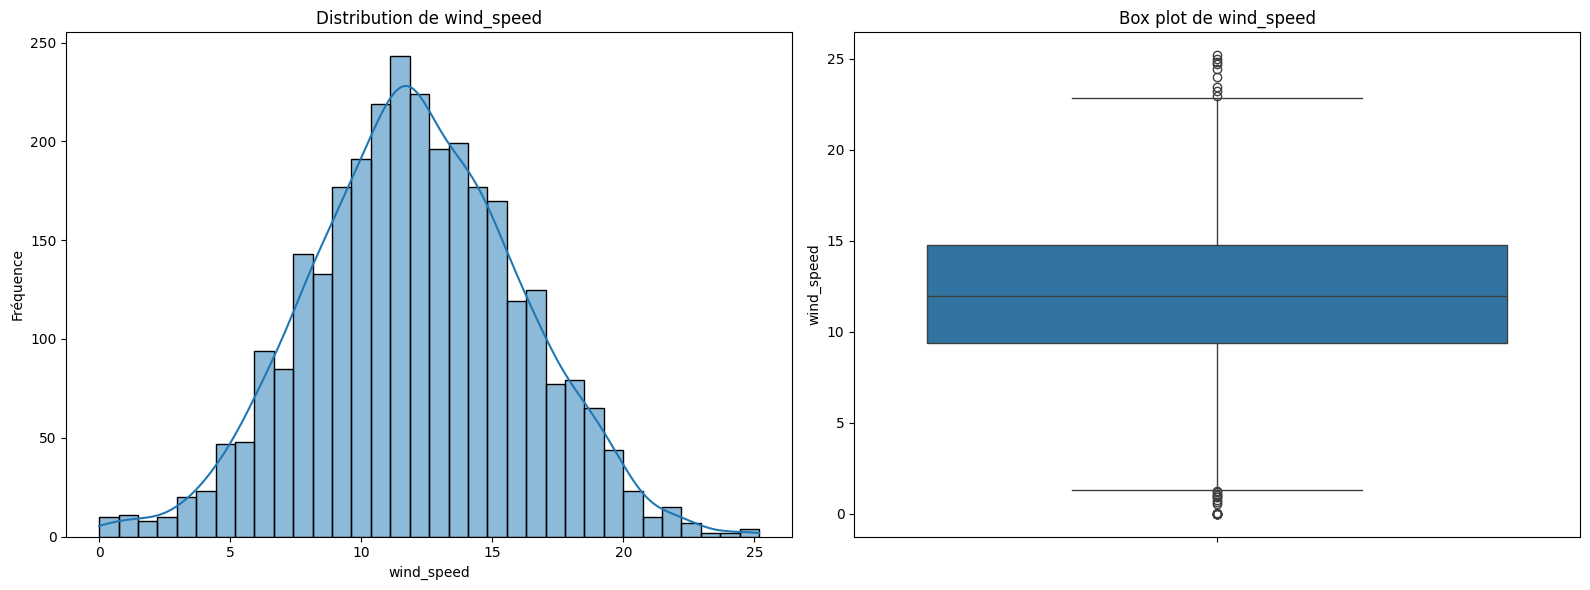


Analyse de la colonne : vibration_level


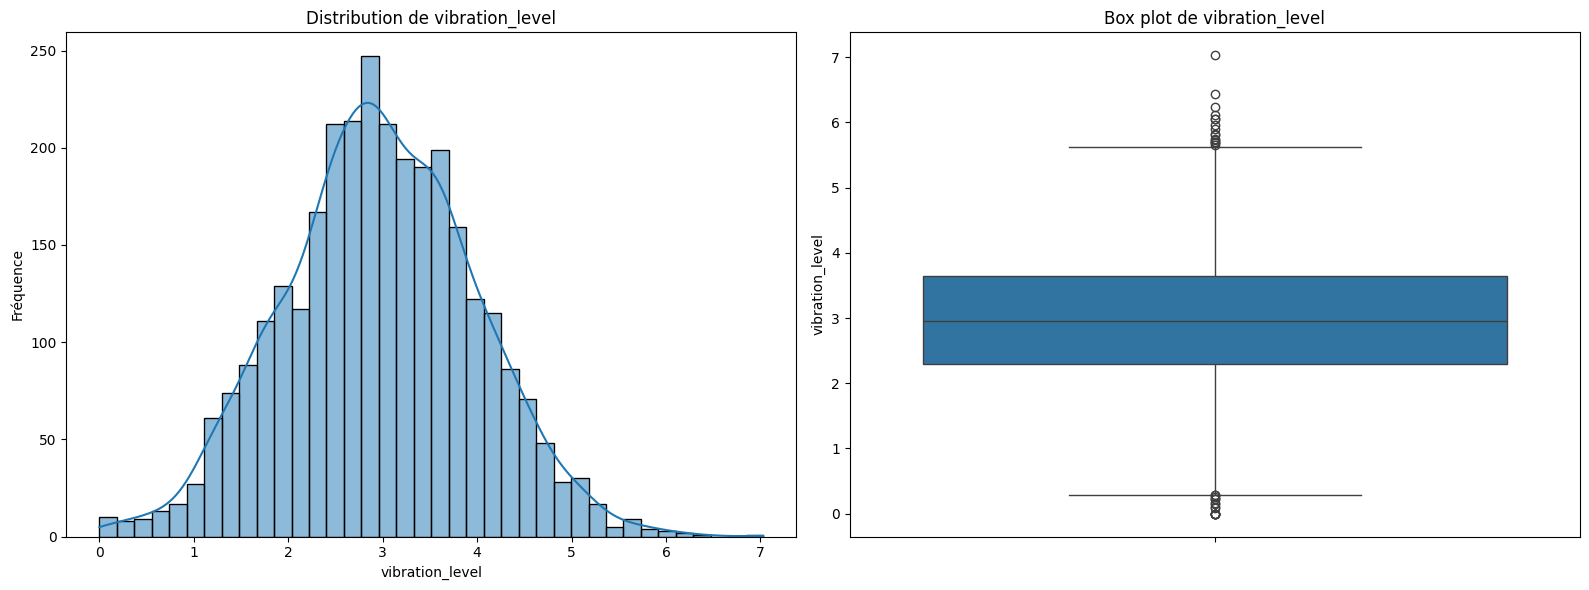


Analyse de la colonne : temperature


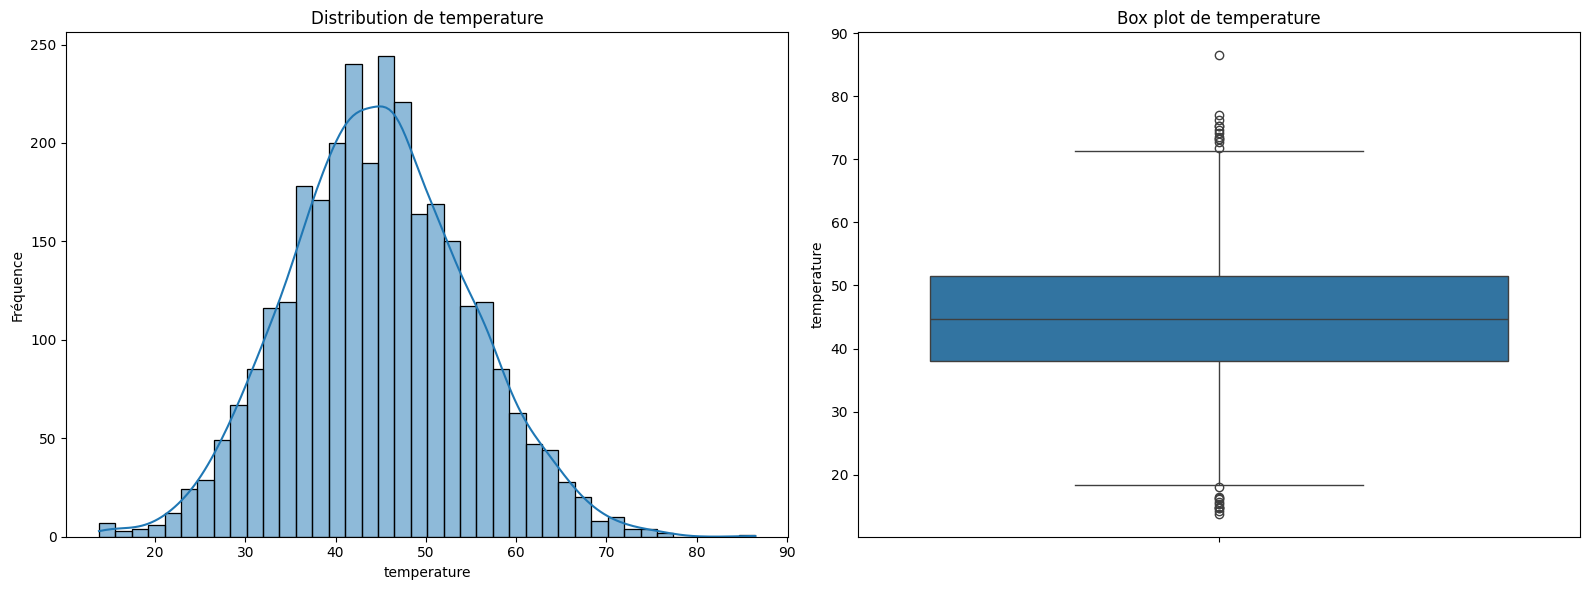


Analyse de la colonne : power_output


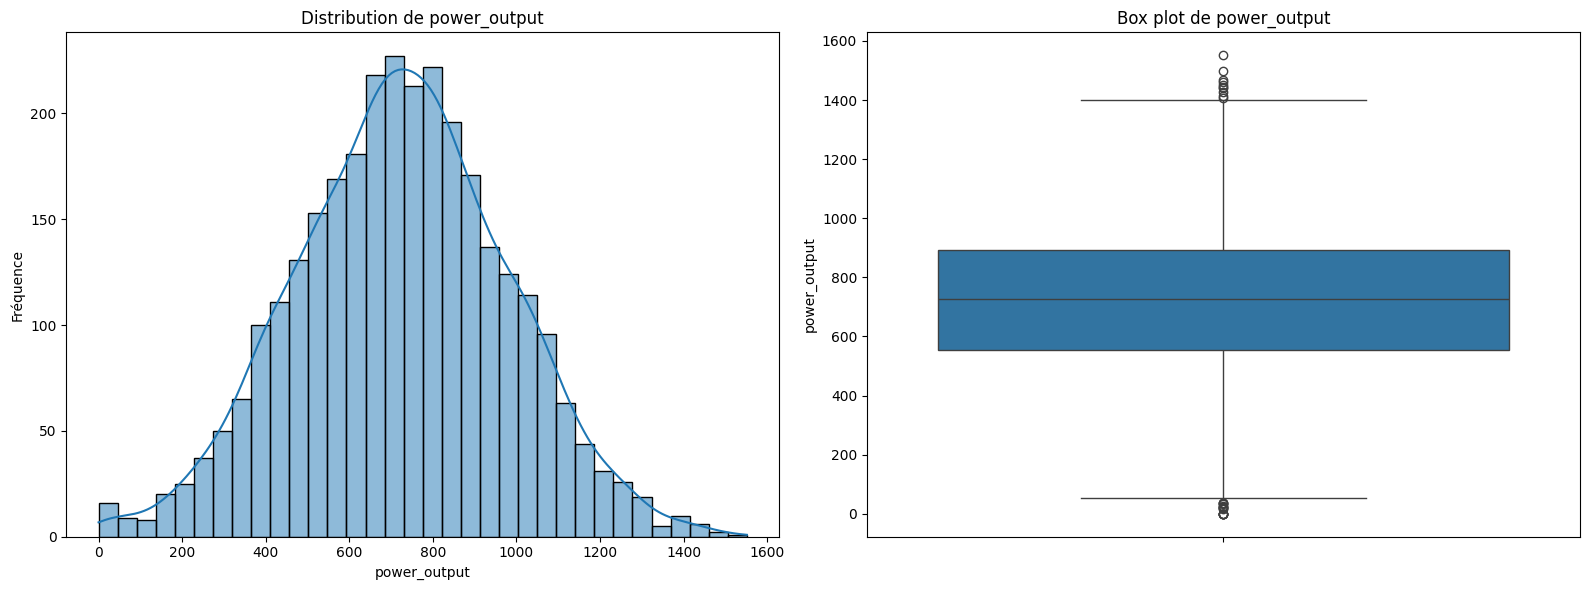


Analyse de la colonne : time_to_failure_days


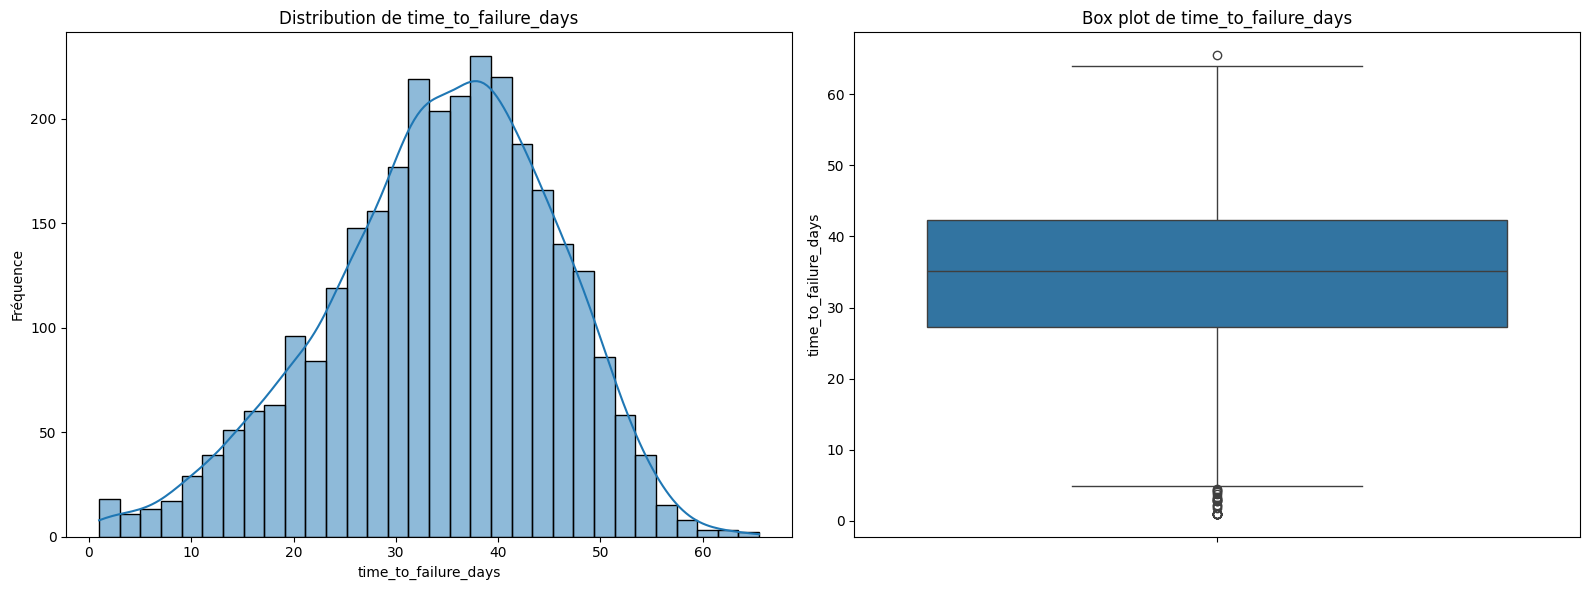

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes numériques à analyser
numerical_columns = ['wind_speed', 'vibration_level', 'temperature', 'power_output', 'time_to_failure_days']

# Itérer sur chaque colonne et créer les visualisations
for col in numerical_columns:
    print(f"\nAnalyse de la colonne : {col}")

    # Créer une figure avec deux sous-graphiques (histogramme et box plot)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Histogramme
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution de {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Fréquence')

    # Box Plot
    sns.boxplot(y=df[col], ax=axes[1])
    axes[1].set_title(f'Box plot de {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()


## Analyse des relations entre variables numériques

### Subtask:
Calculer et visualiser une matrice de corrélation sous forme de heatmap pour montrer les relations entre toutes les variables numériques.


**Reasoning**:
The subtask requires calculating and visualizing a correlation matrix for numerical variables. I will first identify the relevant numerical columns, then compute the correlation matrix, and finally display it as a heatmap with annotations for better understanding.



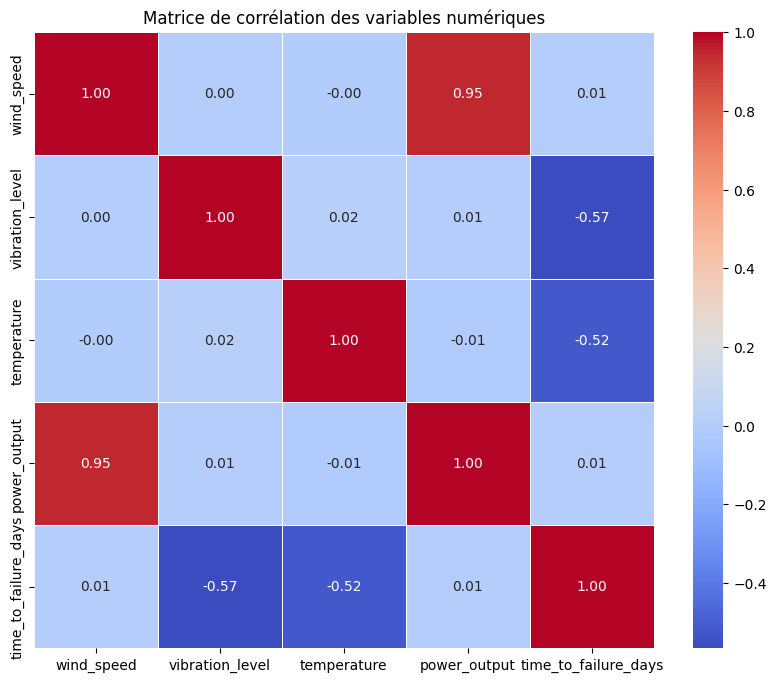

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les colonnes numériques pertinentes pour la corrélation
# Exclure 'turbine_id' et 'technician_id' car ce sont des identifiants et non des variables continues pour la corrélation
numerical_cols_for_corr = ['wind_speed', 'vibration_level', 'temperature', 'power_output', 'time_to_failure_days']

# Calculer la matrice de corrélation
correlation_matrix = df[numerical_cols_for_corr].corr()

# Créer une carte de chaleur (heatmap) de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation des variables numériques')
plt.show()

## Analyse des tendances temporelles

### Subtask:
Créer des graphiques linéaires de `power_output`, `wind_speed`, `vibration_level` et `temperature` en fonction de `date_measure` (après conversion en datetime) pour détecter les tendances saisonnières ou les évolutions au fil du temps.


**Reasoning**:
The subtask requires converting the 'date_measure' column to datetime, sorting the DataFrame by this column, and then creating line plots for specified numerical variables against the date to observe temporal trends. This code block will perform these data preparation and visualization steps.



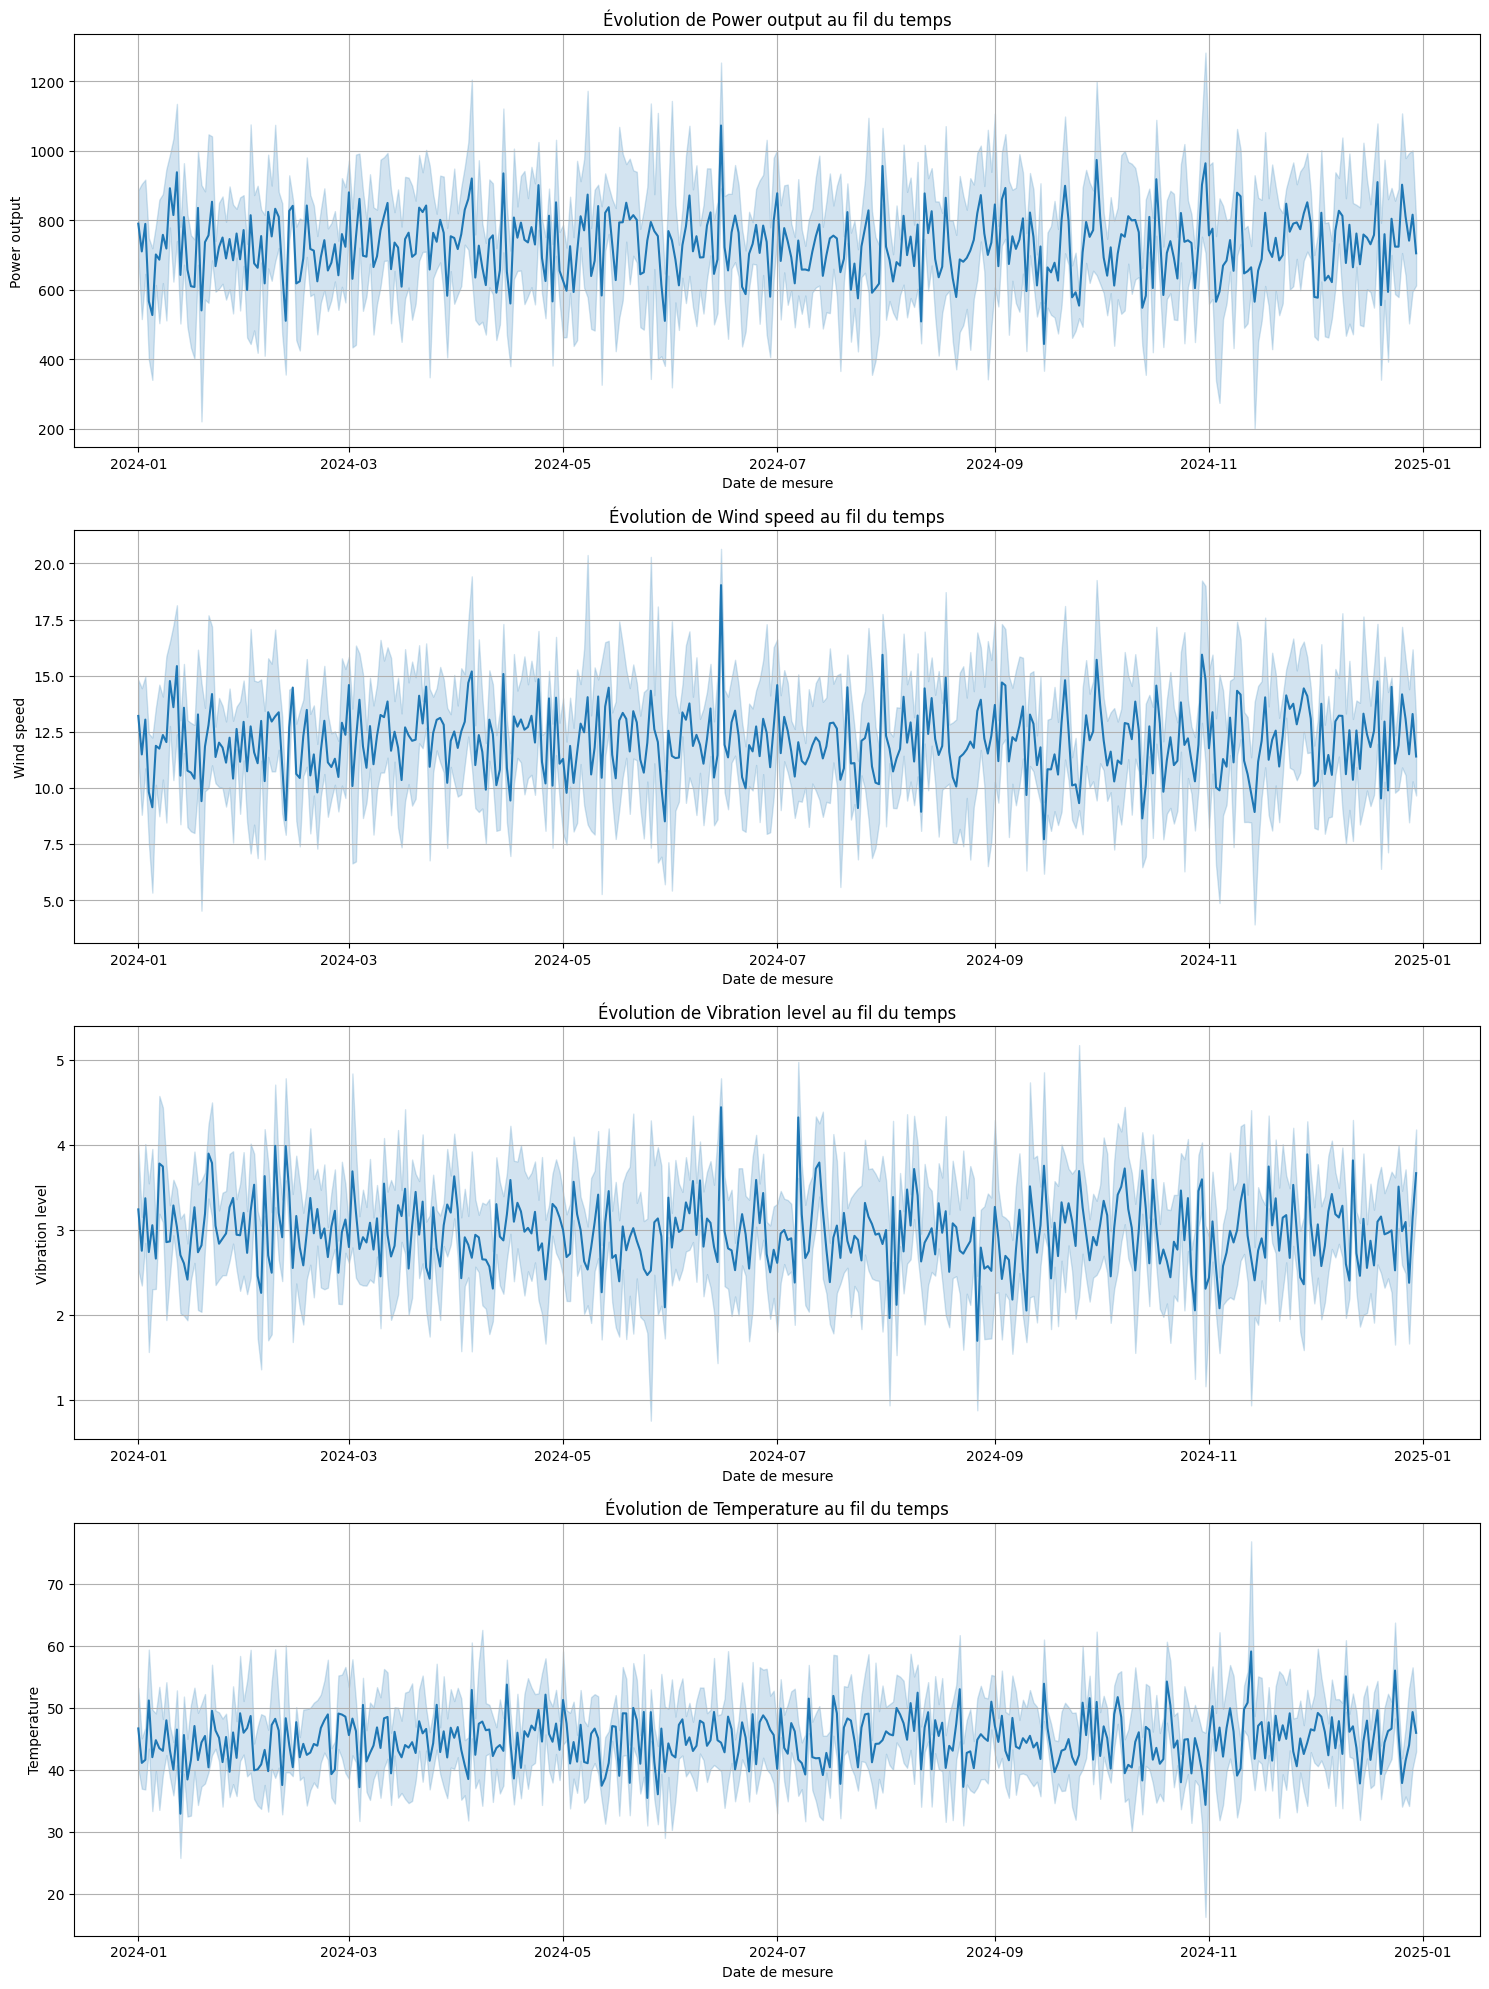

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Convertir la colonne 'date_measure' en format datetime
df['date_measure'] = pd.to_datetime(df['date_measure'])

# 2. Trier le DataFrame par la colonne 'date_measure'
df = df.sort_values(by='date_measure').reset_index(drop=True)

# 3. et 4. Créer des graphiques linéaires pour chaque variable numérique

# Liste des colonnes numériques à visualiser les tendances temporelles
trend_columns = ['power_output', 'wind_speed', 'vibration_level', 'temperature']

# Définir la taille de la figure en fonction du nombre de graphiques
fig, axes = plt.subplots(nrows=len(trend_columns), ncols=1, figsize=(15, 5 * len(trend_columns)))

# Assurer que 'axes' est toujours un tableau même s'il n'y a qu'un seul graphique
if len(trend_columns) == 1:
    axes = [axes]

for i, col in enumerate(trend_columns):
    sns.lineplot(data=df, x='date_measure', y=col, ax=axes[i])
    axes[i].set_title(f'Évolution de {col.replace("_", " ").capitalize()} au fil du temps')
    axes[i].set_xlabel('Date de mesure')
    axes[i].set_ylabel(col.replace("_", " ").capitalize())
    axes[i].grid(True)

# 6. Ajuster automatiquement les paramètres des sous-graphiques et afficher
plt.tight_layout()
plt.show()

## Analyse des variables catégorielles et leurs impacts

### Subtask:
Utiliser des diagrammes à barres pour visualiser les distributions des variables catégorielles (`maintenance_done`, `failure_within_7d`, `turbine_id`, `technician_id`) et des boîtes à moustaches pour analyser l'impact de ces variables sur des métriques numériques clés comme `power_output` et `vibration_level`.


## Summary:

### Data Analysis Key Findings

*   **Distribution of Numerical Variables**: Histograms and box plots revealed the distributions of `wind_speed`, `vibration_level`, `temperature`, `power_output`, and `time_to_failure_days`. The visualizations enabled the identification of their statistical properties and potential outliers.
*   **Correlation between Numerical Variables**: A heatmap of the correlation matrix showed relationships among `wind_speed`, `vibration_level`, `temperature`, `power_output`, and `time_to_failure_days`. The specific correlation values were displayed (e.g., as `.2f` formatted numbers) and highlighted positive or negative associations between variables.
*   **Temporal Trends**: Line plots demonstrated the evolution of `power_output`, `wind_speed`, `vibration_level`, and `temperature` over time. These visualizations captured any temporal patterns or trends within the data.

### Insights or Next Steps

*   Further investigation into the identified outliers in numerical variables (`wind_speed`, `vibration_level`, `temperature`, `power_output`, `time_to_failure_days`) is recommended to determine their cause and impact on turbine performance or maintenance needs.
*   The correlations observed between numerical variables, especially those related to `power_output` and `time_to_failure_days`, should be explored in more detail to build predictive models or identify key performance indicators.
